# Ignore warnings

In [1]:
import warnings
warnings.simplefilter("ignore")

# Importing packages and loading data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from thefuzz import process
from dataprep.clean import clean_country

#sns.set_palette('rocket')

In [3]:
df = pd.read_excel("D:\SelfStudy\DataScience\DataSets\candyhierachy\candyhierarchy2017 .xlsx")

# Data Exploration and Cleaning

In [4]:
df.shape

(2460, 120)

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [6]:
df.sample(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
913,90276583,No,Male,15,USA,Illinois,MEH,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,MEH,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,MEH,MEH,MEH,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,MEH,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,"Math and sciences, technology, the girl I like...",The girl I like (when she is with her boyfriend),"A lot of the things i despair I didn't know, t...",Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(78, 21)"
2019,90285101,No,Male,42,USA,MA,JOY,JOY,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,JOY,DESPAIR,DESPAIR,MEH,MEH,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,MEH,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,MEH,JOY,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,JOY,JOY,JO

In [7]:
df.duplicated().sum()

0

### Rename columns 

In [8]:
df = df.rename(columns={'Q1: GOING OUT?':'Going out', 'Q2: GENDER':'Gender', 'Q3: AGE':'Age',
'Q4: COUNTRY':'Country','Q5: STATE, PROVINCE, COUNTY, ETC':'State', 'Q7: JOY OTHER':' Joy other',
'Q8: DESPAIR OTHER':'Despair other', 'Q9: OTHER COMMENTS':'Other comments',
'Q10: DRESS':'Dress','Q11: DAY':'Day', 'Q12: MEDIA [Science]':'Science',
'Q12: MEDIA [Daily Dish]':'Daily Dish', 'Q12: MEDIA [ESPN]':'ESPN',
'Q12: MEDIA [Yahoo]':'Yahoo'})

In [9]:
df.columns = df.columns.str.strip('Q6 |')

In [10]:
df.head()

,Internal ID,Going out,Gender,Age,Country,State,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Joy other,Despair other,Other comments,Dress,Unnamed: 113,Day,Daily Dish,Science,ESPN,Yahoo,"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JO

In [11]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 120 columns):
 #    Column                                                                            Non-Null Count  Dtype  
---   ------                                                                            --------------  -----  
 0    Internal ID                                                                       2460 non-null   int64  
 1    Going out                                                                         2350 non-null   object 
 2    Gender                                                                            2419 non-null   object 
 3    Age                                                                               2376 non-null   object 
 4    Country                                                                           2396 non-null   object 
 5    State                                                                             2360 non-null   obje

In [12]:
round(df.isna().sum()/len(df)*100, 2)

Internal ID                                                                           0.00
Going out                                                                             4.47
Gender                                                                                1.67
Age                                                                                   3.41
Country                                                                               2.60
State                                                                                 4.07
100 Grand Bar                                                                        30.37
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    29.84
Any full-sized candy bar                                                             27.32
Black Jacks                                                                          38.94
Bonkers (the candy)                                                                  40.33

In [13]:
df.nunique()

Internal ID                                                                          2460
Going out                                                                               2
Gender                                                                                  4
Age                                                                                   106
Country                                                                               128
State                                                                                 511
100 Grand Bar                                                                           3
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)       3
Any full-sized candy bar                                                                3
Black Jacks                                                                             3
Bonkers (the candy)                                                                     3
Bonkers (t

### Drop useless columns and columns have a lot of NaN 

In [14]:
df = df.drop(columns=['Internal ID','Joy other','Despair other','Other comments','Unnamed: 113','Click Coordinates (x, y)'])

In [15]:
df.head(1)

,Going out,Gender,Age,Country,State,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Daily Dish,Science,ESPN,Yahoo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop rows have a lot of NaN

In [16]:
df.dropna(subset=df.columns[5:-6], how ='all', inplace=True)
df.reset_index(inplace=True, drop=True)

In [17]:
df.head()

,Going out,Gender,Age,Country,State,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Daily Dish,Science,ESPN,Yahoo
0,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
1,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
3,No,Male,NaN,NaN,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,ME

In [18]:
df.duplicated().sum()

0

In [19]:
df.isna().sum()

Going out                                                                              64
Gender                                                                                 11
Age                                                                                    36
Country                                                                                22
State                                                                                  42
100 Grand Bar                                                                          90
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)      77
Any full-sized candy bar                                                               15
Black Jacks                                                                           301
Bonkers (the candy)                                                                   335
Bonkers (the board game)                                                              349
Bottle Cap

## Clean `Going out` column

In [20]:
df['Going out'].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
df['Going out'].isna().sum()

64

In [22]:
df['Going out'].value_counts()

No     1500
Yes     239
Name: Going out, dtype: int64

I think some people did not answer this question beacause they were not sure

In [23]:
df['Going out'] = df['Going out'].fillna('Not sure')

In [24]:
going_sizes = round(df['Going out'].value_counts(normalize=True)*100, 2)

<AxesSubplot:xlabel='Going out', ylabel='count'>

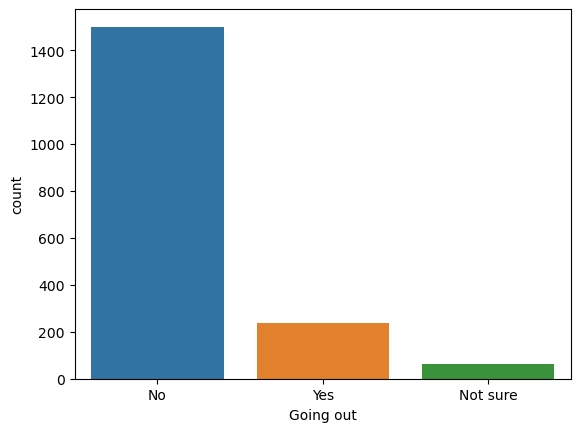

In [25]:
sns.countplot(df['Going out'])

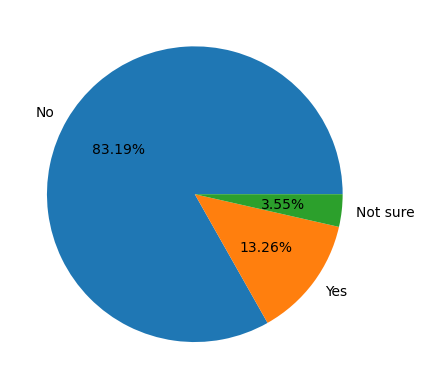

In [26]:
plt.pie(going_sizes.values, labels=going_sizes.index, autopct='%2.2f%%')
plt.show()

Most of the people answered the survey are not going trick or treating themselves

## Clean `Gender` column

In [27]:
df['Gender'].value_counts()

Male                  1087
Female                 618
I'd rather not say      61
Other                   26
Name: Gender, dtype: int64

In [28]:
df['Gender'].isna().sum()

11

In [29]:
df['Gender'] = df['Gender'].fillna(method='bfill', axis=0)

In [30]:
round(df['Gender'].value_counts(normalize=True)*100, 2)

Male                  60.57
Female                34.61
I'd rather not say     3.38
Other                  1.44
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

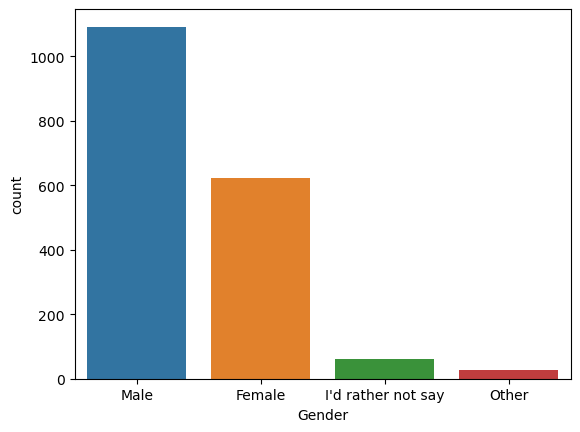

In [31]:
sns.countplot(df['Gender'])

Most of the people answered the survey are males

# Clean `Age` column

In [32]:
df['Age'].dtype

dtype('O')

In [33]:
df['Age'].unique()

array([44, 40, 23, nan, 33, 53, 56, 64, 43, 37, 59, 48, 45, 49, 34, 35,
       38, 58, 50, 47, 52, 63, 65, 41, 31, 61, 46, 54, 62, 29, 42, 39, 36,
       32, 28, 69, 67, 30, 25, 22, 51, 70, 24, 27, 18, 19, 'Old enough',
       57, 66, 12, 'Many', 60, 55, '?', 21, 11, 'no', 68, 20, 6, 10, 71,
       90, 13, 26, '45-55', 312, 72, 99, 'hahahahaha', 9, 88, 39.4, 74,
       102, 'older than dirt', 15, 8, 75, 17, 'Enough', 'See question 2',
       '24-50', 7, 14, 'Over 50', 76, 100, 1000, 16, '46 Halloweens.',
       'ancient', 77, 'OLD', 'old', 'MY NAME JEFF', 4, 73,
       '59 on the day after Halloween', 'old enough',
       'I can remember when Java was a cool new language'], dtype=object)

In [34]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [35]:
df['Age'].unique()

array([  44. ,   40. ,   23. ,    nan,   33. ,   53. ,   56. ,   64. ,
         43. ,   37. ,   59. ,   48. ,   45. ,   49. ,   34. ,   35. ,
         38. ,   58. ,   50. ,   47. ,   52. ,   63. ,   65. ,   41. ,
         31. ,   61. ,   46. ,   54. ,   62. ,   29. ,   42. ,   39. ,
         36. ,   32. ,   28. ,   69. ,   67. ,   30. ,   25. ,   22. ,
         51. ,   70. ,   24. ,   27. ,   18. ,   19. ,   57. ,   66. ,
         12. ,   60. ,   55. ,   21. ,   11. ,   68. ,   20. ,    6. ,
         10. ,   71. ,   90. ,   13. ,   26. ,  312. ,   72. ,   99. ,
          9. ,   88. ,   39.4,   74. ,  102. ,   15. ,    8. ,   75. ,
         17. ,    7. ,   14. ,   76. ,  100. , 1000. ,   16. ,   77. ,
          4. ,   73. ])

In [36]:
df['Age'].describe()

count    1748.000000
mean       43.474485
std        26.649718
min         4.000000
25%        35.000000
50%        42.000000
75%        50.000000
max      1000.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

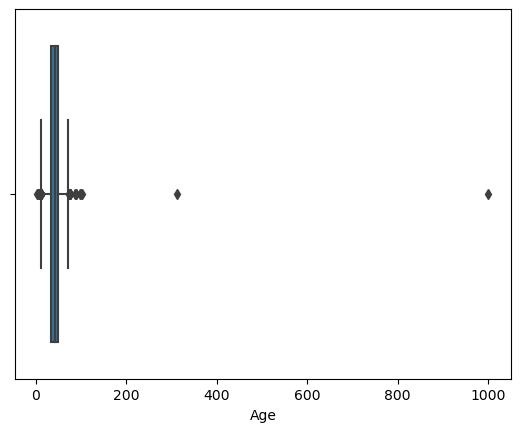

In [37]:
sns.boxplot(df['Age'])

I will remove the outliers

In [38]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [39]:
filt = (df['Age'] < lower) | (df['Age'] > upper)
df.loc[filt, 'Age'] = np.nan

In [40]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [41]:
df['Age'] = df['Age'].astype('int')

<AxesSubplot:xlabel='Age'>

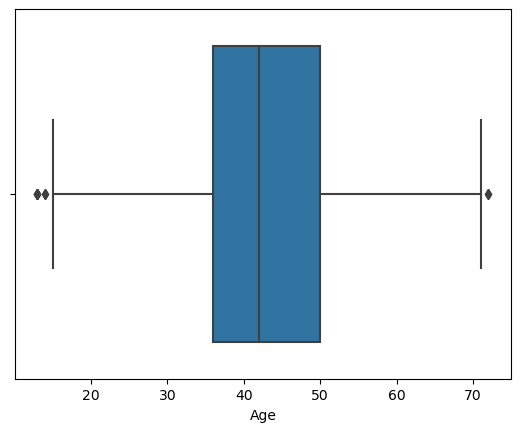

In [42]:
sns.boxplot(df['Age'])

In [43]:
df['Age'].describe()

count    1803.00000
mean       42.85025
std        10.54454
min        13.00000
25%        36.00000
50%        42.00000
75%        50.00000
max        72.00000
Name: Age, dtype: float64

Most people answered the survey are between 36 and 50 years old

# Clean `Country` column

In [44]:
df['Country'].unique()

array(['USA ', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US', 'Murica',
       'USA', 'uk', 'United States', 'united states', 'Usa',
       'United staes', 'United Kingdom', 'United States of America',
       'UAE', 'United States ', 'England', 'canada ', 'United states',
       'u.s.a.', 'USAUSAUSA', 'america', 'france',
       'United States of America ', 'U.S.A.', 'Mexico', 'Canada ',
       'united states of america', 'US of A', 'UK', 'Unites States',
       'The United States', 'North Carolina ', 'Netherlands', 'Europe',
       'Earth', 'U S', 'u.s.', 'Costa Rica',
       'The United States of America', 'cascadia', 'insanity lately',
       'Greece', 'USA? Hard to tell anymore..', "'merica", 'Pittsburgh',
       'United State', 'France', 'U.S.', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', 'Korea', 'Australia',
       'California', 'Japan', 'USa', 'South africa',
       'I pretend to be from Canada, but I am really from the United States.',
 

In [45]:
df['Country'] = clean_country(df, 'Country')['Country_clean']

  0%|          | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	1167 values cleaned (64.73%)
	64 values unable to be parsed (3.55%), set to NaN
Result contains 1717 (95.23%) values in the correct format and 86 null values (4.77%)


In [46]:
df['Country'].value_counts(normalize=True)*100

United States     88.002330
Canada             9.376820
Germany            0.407688
United Kingdom     0.349447
Netherlands        0.232964
Ireland            0.174723
Japan              0.174723
France             0.174723
South Korea        0.116482
Australia          0.116482
Mexico             0.116482
Denmark            0.116482
Switzerland        0.116482
Greece             0.058241
Costa Rica         0.058241
South Africa       0.058241
Iceland            0.058241
Jersey             0.058241
Singapore          0.058241
Taiwan             0.058241
China              0.058241
Spain              0.058241
Name: Country, dtype: float64

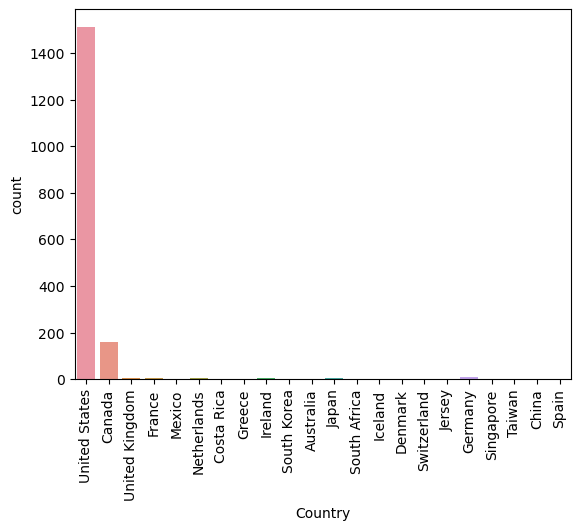

In [47]:
sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.show()

88% of the people answered the survey are from United States and and 9.4% of them are from canada

# Clean `State` column

In [48]:
df['State'].unique()

array(['NM', 'or', 'exton pa', nan, 'ontario', 'Ontario', 'Wa', 'Quebec',
       'NY', 'California', 'Texas', 'NEW YORK', 'CO', 'aberdeenshire',
       'Alberta', 'Wisconsin, 53705', 'RI', 'minnesota', 'Michigan',
       'Florida', 'New Jersey', 'Colorado', 'Los Angeles, California',
       'CA', 'Chicago, Illinois', 'Wisconsin', 'Minnesota ', 'London',
       'mn', 'TEXAS', 'District of Columbia', 'Washington',
       'Massachusetts ', 'OR', 'Illinois', 'New York', 'massachusetts',
       'Abu Dhabi', 'TX', 'Dc', 'VA', 'MN', 'yukon', 'Pennsylvania ',
       'MD', 'Virginia', 'Alberta ', 'OXFORDSHIRE', 'DC', 'Iowa', 'Mn',
       'TN', 'Ohio', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'Ny',
       'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'north carolina', 'Tennessee ',
       'Knox county, Tennessee', 'New Mexico', 'Maine', 'maine',
       'Virginia, Arlington', 'WA', 'Illinois ', 'Il', 'New Hamp

This column is useless because it has many unique values. So, I will drop it

In [49]:
df = df.drop(columns=['State'])

# Clean `Dress` column

In [50]:
dress_values_ratios = round(df['Dress'].value_counts(normalize=True)*100, 2)

In [51]:
df['Dress'].isna().sum()

90

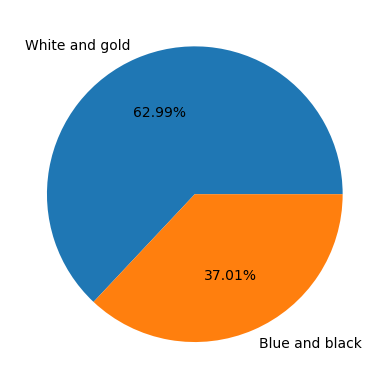

In [52]:
plt.pie(dress_values_ratios.values, labels=dress_values_ratios.index, autopct='%2.2f%%')
plt.show()

Most of the people sawthe dress in colors (White and gold)

# Clean `Day` column

In [53]:
df['Day'].value_counts(normalize=True)*100

Friday    62.896711
Sunday    37.103289
Name: Day, dtype: float64

In [54]:
df['Day'].isna().sum()

70

In [55]:
df['Day'] = df['Day'].fillna('Another day')

In [56]:
day_values_ratios = round(df['Day'].value_counts(normalize=True)*100, 2)

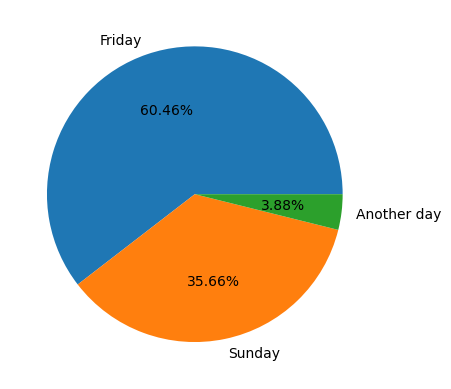

In [57]:
plt.pie(day_values_ratios.values, labels=day_values_ratios.index, autopct='%2.2f%%')
plt.show()

Most of the people prefer Friday

# Clean Media (Daily Dish, Science,	ESPN and Yahoo) columns

Everyone answered the survey clicked only one website. So, I will convert these columns to only one column called "website" which contains the choosen website  

In [58]:
media = ['Daily Dish', 'Science', 'ESPN', 'Yahoo']

In [59]:
media_df = df[media]
media_df.head()

,Daily Dish,Science,ESPN,Yahoo
0,NaN,1.0,NaN,NaN
1,NaN,1.0,NaN,NaN
2,NaN,1.0,NaN,NaN
3,NaN,1.0,NaN,NaN
4,NaN,1.0,NaN,NaN


In [60]:
website = []
for i in range(len(media_df)):
    flag = 1
    for m in media:
        if media_df.loc[i, m]==1.0:
            website.append(m)
            flag = 0
            break
    if flag:
         website.append('No answer')
print(website)

['Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'No answer', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'No answer', 'Science', 'Science', 'Science', 'Daily Dish', 'Science', 'No answer', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Yahoo', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'ESPN', 'Yahoo', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Daily Dish', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'ESPN', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'ESPN', 'No answer', 'Science', 'Science', 'Science', 'Science', 'Science', 'Science', 'Daily Dish', 'Science', 'Science', 'Science', 'No answer', 'No answer', 'Science', 'No answer', 'Science',

In [61]:
df['website'] = website

In [62]:
df.head()

,Going out,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Daily Dish,Science,ESPN,Yahoo,website
0,No,Male,44,United States,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN,Science
1,No,Male,40,United States,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN,Science
2,No,Male,23,United States,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN,Science
3,No,Male,42,N

In [63]:
df = df.drop(columns=media)

In [64]:
df.head()

,Going out,Gender,Age,Country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,website
0,No,Male,44,United States,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,Science
1,No,Male,40,United States,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,Science
2,No,Male,23,United States,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,Science
3,No,Male,42,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY

<AxesSubplot:xlabel='website', ylabel='count'>

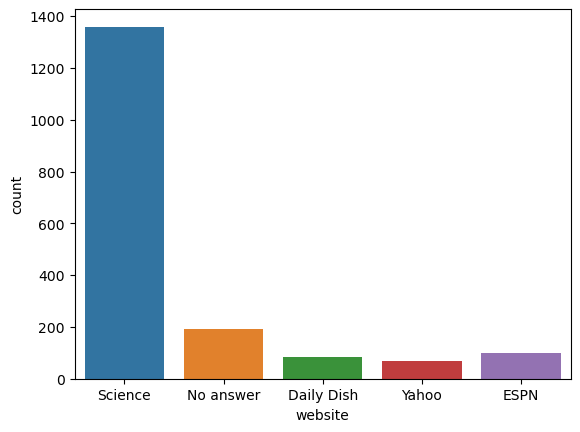

In [65]:
sns.countplot(x='website', data=df)

Science is the most likely website to check out

## Top `10 loved` and `10 hated` chocolates

In [66]:
candy = df[df.columns[4:-3]]
candy.head()

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),Jolly Rancher (bad flavor),Jolly Ranchers (good flavor),JoyJoy (Mit Iodine!),Junior Mints,Senior Mints,Kale smoothie,Kinder Happy Hippo,Kit Kat,LaffyTaffy,LemonHeads,Licorice (not black),Licorice (yes black),Lindt Truffle,Lollipops,Mars,Maynards,Mike and Ike,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Blue M&M's,Red M&M's,Green Party M&M's,Independent M&M's,Abstained from M&M'ing.,Minibags of chips,Mint Kisses,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
1,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
2,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,JOY,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
3,JOY,DESPAIR,JOY,NaN,NaN,NaN,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,MEH,MEH,JOY,NaN,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,MEH,JOY,JOY,MEH,MEH,MEH,MEH,MEH,NaN,JOY,NaN,DESPAIR,NaN,JOY,MEH,MEH,MEH,MEH,JOY,MEH,JOY,NaN,JOY,JOY,JOY,JOY,JOY,JOY,JOY,NaN,NaN,NaN,JOY,JOY,JOY,JOY,MEH,JO

In [67]:
candy.isna().sum().sum()

10154

In [68]:
candy.fillna('MEH', inplace=True)

In [69]:
candy.isna().sum().sum()

0

In [70]:
candy.replace({'JOY':1, 'DESPAIR':-1, 'MEH':0}, inplace=True)

In [71]:
ranking = candy.sum().sort_values(ascending=False)

In [72]:
loved = ranking[ranking.values>0]

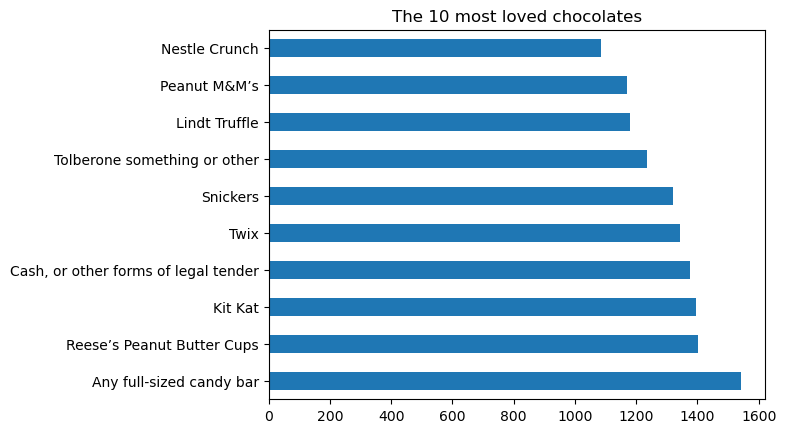

In [73]:
loved.head(10).plot(kind='barh', title='The 10 most loved chocolates')
plt.show()

In [74]:
hated = ranking[ranking.values <= 0]
hated = hated.multiply(-1)
hated = hated.sort_values(ascending=False)

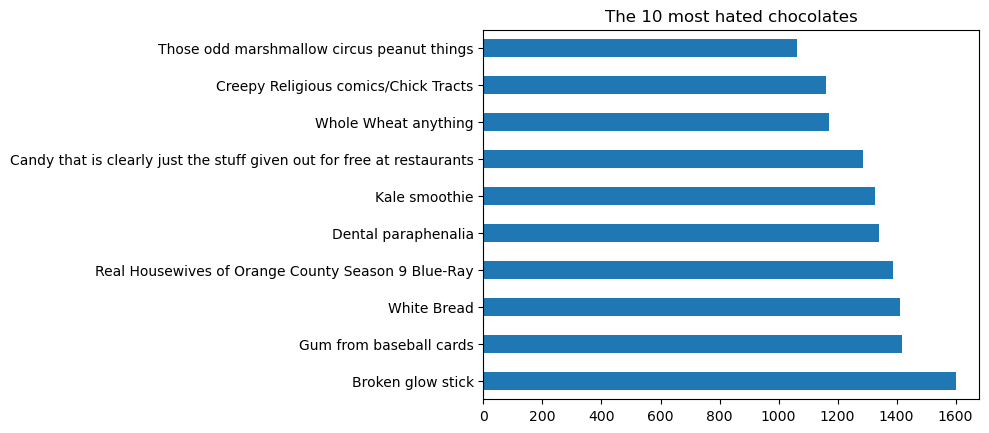

In [75]:
hated.head(10).plot(kind='barh', title='The 10 most hated chocolates')
plt.show()